# <span style="color:purple">Week 2 -- Corpus Linguistics</span> 
### <span style="color:purple">Art of Content Analysis</span>  
<span style="color:purple">-- File: Jingying (Jane) Bi Homework <br>
-- Name: Jingying Bi <br>
-- UCID: 12174556 <br>
<br>
**Brief description of my work:** <br>
In this homework, I will study the language which has been used to criticize the European art works during Renaissance Era (1300-1700) and 20th century. Basically, the art works during Renaissance Era are abour Jesus, Christian, Bible stories and Religions. As for the 20th century, various art schools florished, such as Fauvism (led by Matisse), Cubism (led by Picasso), Surrealism (led by Dali). <br>
To simplify the discussion, I will compare the criticism on the art works of Botticelli during Renaissance Era and the art works of Matisse during the 20th century. <br> Reference: [Western art movents history](http://www.xzbu.com/9/view-6005661.htm) <br><br>
**Below are some famous paintings** </span>
![title](ArtEconomics.jpg)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that input and interrogate a corpus relating to your anticipated final project. Turn your text into an nltk `Text` object, and explore all of the features examined above, and others that relate to better understanding your corpus in relation to your research question. </span>

### <span style="color:purple">1.1 Import Libraries and Packages </span>

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
import lucem_illud #pip install git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import requests #for http requests
import nltk #the Natural Language Toolkit
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
from nltk.corpus import stopwords #For stopwords
import json #For API responses
import urllib.parse #For joining urls

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

### <span style="color:purple">1.2 Basics </span>

In [2]:
# load the text
with open('CubismArt.txt') as f:
    CubismArt = f.read()
with open('RenaissanceArt.txt') as f:
    RenaissanceArt = f.read()

# some statistics 
#print(CubismArt[:1000])
#len(CubismArt)

# read the corpus as a list of words
import nltk
nltk.download('punkt')
Cubism_tokens = nltk.word_tokenize(CubismArt)
Renaissance_tokens = nltk.word_tokenize(RenaissanceArt)
#sentence = nltk.sent_tokenize(CubismArt)
#sentence[1:10]

[nltk_data] Downloading package punkt to /home/jingyingb/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### <span style="color:purple">1.3 Count Word</span>

In [3]:
# create word count function
def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

# run the function 
Cubism_countedWords = wordCounter(Cubism_tokens)
Renaissance_countedWords = wordCounter(Renaissance_tokens)
# Cubism_countedWords[:10]

# alternative way to count the word
Cubism_Text = nltk.Text(Cubism_tokens)
Renaissance_Text = nltk.Text(Renaissance_tokens)
# CubismText.count('pablo')

# words = [word.lower() for word in nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')]
Cubism_freq = nltk.FreqDist(Cubism_tokens)
Renaissance_freq = nltk.FreqDist(Renaissance_tokens)
# print (freq['cubism'])

# sort the counting results in descending
Cubism_countedWords.sort_values('count', ascending=False, inplace=True)
Renaissance_countedWords.sort_values('count', ascending=False, inplace=True)
# Renaissance_countedWords[:100]

### <span style="color:purple">1.4 Rank Plot and log-log Plot</span> 
<span style="color:purple">
**Zipf's Law:** <br>
Both Cubism and Renaissance examples in ***Figure 1*** show the inverse relationship between the word frequencies and the rank of the word.
</span> 

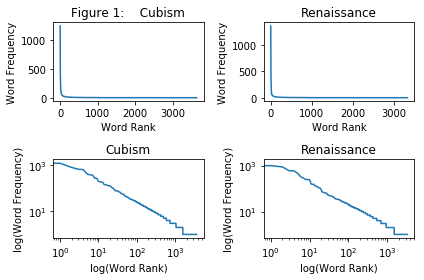

In [4]:
# Explore the relationship between word frequency and rank
fig = plt.figure(1)

plt.subplot(221)
plt.plot(range(len(Cubism_countedWords)), Cubism_countedWords['count'])
plt.title('Figure 1:    Cubism')
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')

plt.subplot(222)
plt.plot(range(len(Renaissance_countedWords)), Renaissance_countedWords['count'])
plt.title('Renaissance')
plt.xlabel('Word Rank')
plt.ylabel('Word Frequency')

ax1 = fig.add_subplot(223)
plt.plot(range(len(Cubism_countedWords)), Cubism_countedWords['count'])
ax1.set_yscale('log')
ax1.set_xscale('log')
plt.title('Cubism')
plt.xlabel('log(Word Rank)')
plt.ylabel('log(Word Frequency)')

ax2 = fig.add_subplot(224)
plt.plot(range(len(Renaissance_countedWords)), Renaissance_countedWords['count'])
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.title('Renaissance')
plt.xlabel('log(Word Rank)')
plt.ylabel('log(Word Frequency)')

plt.tight_layout()
plt.show()

### <span style="color:purple">1.5 Concordance</span> 
<span style="color:purple">
**Run the command below and observe the results. There are several interesting findings.** <br>
**(1) Keyword: picasso**<br>
Cubism emerged in the 19th century which is much later than the Renaissance. However, "picasso" appeared twice in the text of Renaissance. A reasonable way to explain this is that the writer may compare the Cubism with Renaissance and hence mentioned picasso, the representative artist of Cubism. To verify my hypothesis here. I retrieved the two sentences where "picasso" appeared in the Renaissance content. <br> </span> 
<span style="color:orange">
*"...in very simple terms, the italian renaissance re-established western art according to the principles of classical greek art, especially greek sculpture and painting, which provided much of the basis for the grand tour, and which remained unchallenged until pablo picasso and cubism."*<br> </span> 
<span style="color:orange">
*"...and although modern artists, from picasso onwards, have explored new media and art-forms, the main model for western art remains greek antiquity as interpreted by the renaissance."* <br>
These two sentences indeed substantiate my explanation.<br>
</span> 
<span style="color:purple">
**(2) Keyword: christian, church** <br>
During the period before and during the Renaissance, most of the paintings are about bible stories, with characters of Jesus, Saint Mary and angels as well as churches and religion. Hence, in the Renaissance context, "church", "christian" appeared frequently, much more than the case for the Cubism context. 
</span> 

In [5]:
# concordance
Cubism_Index = nltk.text.ConcordanceIndex(Cubism_tokens)
Renaissance_Index = nltk.text.ConcordanceIndex(Renaissance_tokens)
print('==========For the Cubism text==========')
print('----------Keyword: picasso----------')
Cubism_Index.print_concordance('picasso')
print('\n----------Keyword: christian----------')
Cubism_Index.print_concordance('christian')
print('\n----------Keyword: church----------')
Cubism_Index.print_concordance('church')
print('\n==========For the Renaissance text==========')
print('----------Keyword: picasso----------')
Renaissance_Index.print_concordance('picasso')
print('\n----------Keyword: christian----------')
Renaissance_Index.print_concordance('christian')
print('\n----------Keyword: church----------')
Renaissance_Index.print_concordance('church')
#print(countedWords[countedWords['word'] == 'cubism'])
#Cubism_Index.print_concordance('cubism')

==========For the Cubism text==========
----------Keyword: picasso----------
Displaying 25 of 139 matches:
ee cubist pharmaceuticals . pablo picasso , 1910 , girl with a mandolin ( f
e movement was pioneered by pablo picasso and georges braque , joined by je
 constructivism was influenced by picasso 's technique of constructing scul
ially developed in the studios of picasso and braque ; the second phase bei
 distinguish the work of braque , picasso , gris ( from 1911 ) and léger ( 
nal value judgement . [ 4 ] pablo picasso , les demoiselles d'avignon , 190
 the cubist movement [ 11 ] pablo picasso , 1909-10 , figure dans un fauteu
oned between 1907 and 1911. pablo picasso 's 1907 painting les demoiselles 
in referred to landscapes made by picasso in 1909 , such as reservoir at ho
i le fauconnier , yet no works by picasso or braque were exhibited . [ 4 ] 
ue were exhibited . [ 4 ] by 1911 picasso was recognized as the inventor of
s were too distinct from those of picasso and braque to b

In [6]:
Renaissance_sen = nltk.sent_tokenize(RenaissanceArt)
for x in Renaissance_sen:
    if 'picasso' in x:
        print(x)

in very simple terms, the italian renaissance re-established western art according to the principles of classical greek art, especially greek sculpture and painting, which provided much of the basis for the grand tour, and which remained unchallenged until pablo picasso and cubism.
and although modern artists, from picasso onwards, have explored new media and art-forms, the main model for western art remains greek antiquity as interpreted by the renaissance.


### <span style="color:purple">1.6 Collocations</span> 
<span style="color:purple">The collocation results seem to be quite reasonable. For instance, in the Cubism text, "pablo picasso" and "george braque" are two most famous Cubists. In the Renaissance text, "renaissance art" refers to those artworks created during the Renaissance period. "middle ages" just show its closeness to the Renaissance. "linear perspective" is the most common perspective technique applied in the paintings at the time. The religious related collocations are sorted as well, such as "sistine chape" and "santa maria". "last supper" is one of the most famous painings by Da Vinci during Ressainance.
</span> 

In [7]:
# collocations
import nltk
nltk.download('stopwords')
print('\n==========For the Cubism text==========')
Cubism_Text.collocations()
#Cubism_Text.common_contexts(['picasso'])
print('\n==========For the Renaissance text==========')
Renaissance_Text.collocations()
#Renaissance_Text.common_contexts(['picasso'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jingyingb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

==========For the Cubism text==========
new york; pablo picasso; section d'or; georges braque; juan gris;
raymond duchamp-villon; salon d'automne; albert gleizes; marcel
duchamp; jean metzinger; still life; robert delaunay; des
indépendants; subject matter; les demoiselles; maison cubiste; salon
des; d'art moderne; guillaume apollinaire; louis vauxcelles

==========For the Renaissance text==========
high renaissance; renaissance art; della francesca; italian
renaissance; last supper; sistine chapel; van eyck; piero della; santa
maria; van der; early renaissance; sandro botticelli; tribute money;
vanishing point; northern europe; 15th century; linear perspective;
middle ages; simone martini; human body


### <span style="color:purple">1.7 Lexical Dispersion Plot</span> 
<span style="color:purple"> In fact, there is little information correctly read from the Lexical Dispersion Plot. Because the text content are a combination of several articles abotu Cubism or Renaissance. There is no time preference nor sequential meanings. Hence this plot could only tell the frequences of the words.</span> 

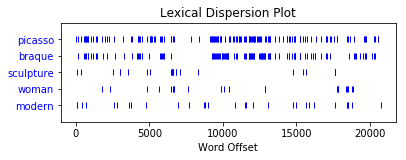

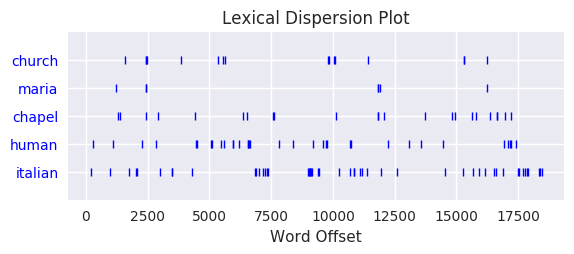

In [8]:
plt.figure(2)

plt.subplot(211)
sns.reset_orig() #Seaborn messes with this plot, disabling it
Cubism_Text.dispersion_plot(['picasso', 'braque', 'sculpture' ,'woman', 'modern'])
sns.set() #Re-enabling seaborn

plt.subplot(212)
sns.reset_orig() #Seaborn messes with this plot, disabling it
Renaissance_Text.dispersion_plot(['church','maria', 'chapel', 'human' ,'italian'])
sns.set() #Re-enabling seaborn

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that filter, stem and lemmatize the tokens in your corpus, and then creates plots (with titles and labels) that map the word frequency distribution, word probability distribution, and at least two conditional probability distributions that help us better understand the social and cultural game underlying the production of your corpus. Create a wordl of words (or normalized words) and add a few vague comments about what mysteries are revealed through it.</span>

### <span style="color:purple">2.1 Stop Word List</span> 
<span style="color:purple">I create a function to generate the stop word freq list, given the stop word. Two examples are shown below for both Cubism and Raissance cases. </span>

In [9]:
# OPTION1: the default stop words in "English"
#print(', '.join(stopwords.words('english')))

# OPTION 2: generate a stop list -- all words that occur before the 'cubism'
# create a function to sort the stop word list, given a "stop word"
countsDict = {}
def stop_word_freq_list(token, stop_word):
    global countsDict
    stop_words_freq_list = []
    for word in token:
        if word in countsDict:
            countsDict[word] += 1
        else:
            countsDict[word] = 1
    word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
    
    for word, count in word_counts:
        if word == stop_word:
            countsDict ={}
            return stop_words_freq_list
        else:
            stop_words_freq_list.append(word)
            
# call function for Cubism, stop word "picasso"
print('==========For the Cubism text==========')
Cubism_stop_word_freq_list = stop_word_freq_list(Cubism_tokens, 'picasso')
print(Cubism_stop_word_freq_list)
# call function for Renaissance, stop word "renaissance"
print('\n==========For the Renaissance text==========')
Renaissance_stop_word_freq_list = stop_word_freq_list(Renaissance_tokens, 'florence')
print(Renaissance_stop_word_freq_list)


==========For the Cubism text==========
[',', 'the', 'of', '.', 'and', 'in', 'to', 'a', '(', ')', 'cubism', 'by', 'as', 'was', 'that']

==========For the Renaissance text==========
['the', ',', 'of', 'and', '.', 'in', 'to', 'a', ')', '(', 'renaissance', 'art', 'was', 'as', 'by', 'that', 'his', 'with', 'for', 'on', 'painting', 'artists', 'is', 'from', 'were', 'which', 'an', 'this']


### <span style="color:purple">2.2 Normalize the Token List -- Stemmer, Lemmer, Stop-Word</span>

In [10]:
import nltk
nltk.download('wordnet')
wordnet = nltk.stem.WordNetLemmatizer()
#wordnet.lemmatize('are')
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jingyingb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### <span style="color:purple">2.3.1 Porter Stemmer & Snowball Stemmer and Conditional Frequency Distribution</span>
<span style="color:purple"> I plot the word frequency distribution after normalizing with the stop list and the porter stemmer. When we see the words whoes length is 3, the same problems appear -- "this" has been reduced to "thi". Similar examples are "tries" to "tri", "does" to "doe", "thus" to "thu". <br>
Using snowball stemmer ameliorates the problem, as seen from the four conditional frequency distribution below. </span>

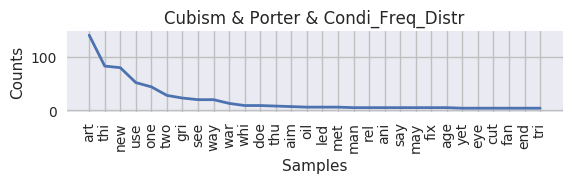

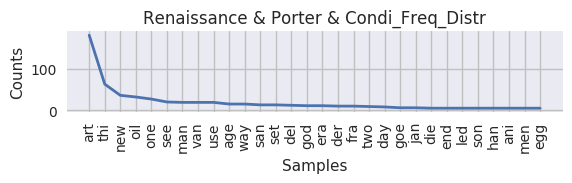

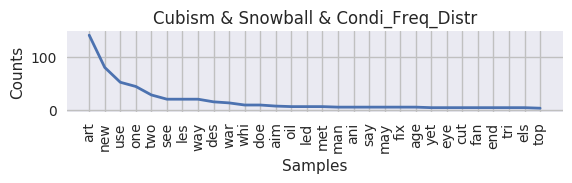

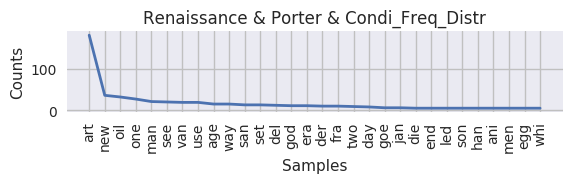

In [11]:
# Retrieve the normalized word tokens list
# --------Stop List + Porter Stemmer-------- #
Cubism_normalized_tokens_porter = normlizeTokens(Cubism_tokens, stopwordLst = stop_words_nltk, stemmer = porter)
Cubism_normalized_tokens_count_porter = len(Cubism_normalized_tokens_porter)
Renaissance_normalized_tokens_porter = normlizeTokens(Renaissance_tokens, stopwordLst = stop_words_nltk, stemmer = porter)
Renaissance_normalized_tokens_count_porter = len(Renaissance_normalized_tokens_porter)
# --------Stop List + Snowball Stemmer-------- #
Cubism_normalized_tokens_snowball = normlizeTokens(Cubism_tokens, stopwordLst = stop_words_nltk, stemmer = snowball)
Cubism_normalized_tokens_count_snowball = len(Cubism_normalized_tokens_snowball)
Renaissance_normalized_tokens_snowball = normlizeTokens(Renaissance_tokens, stopwordLst = stop_words_nltk, stemmer = snowball)
Renaissance_normalized_tokens_count_snowball = len(Renaissance_normalized_tokens_snowball)

#.sum() adds together the lists from each row into a single list
# --------Stop List + Porter Stemmer-------- #
Cubism_cfdist_porter = nltk.ConditionalFreqDist(((len(w), w) for w in Cubism_normalized_tokens_porter))
Renaissance_cfdist_porter = nltk.ConditionalFreqDist(((len(w), w) for w in Renaissance_normalized_tokens_porter))
# --------Stop List + Snowball Stemmer-------- #
Cubism_cfdist_snowball = nltk.ConditionalFreqDist(((len(w), w) for w in Cubism_normalized_tokens_snowball))
Renaissance_cfdist_snowball = nltk.ConditionalFreqDist(((len(w), w) for w in Renaissance_normalized_tokens_snowball))


# plot the distributions of different word lengths
fig = plt.figure(1)
plt.subplot(411)
plt.title('Cubism & Porter & Condi_Freq_Distr')
Cubism_cfdist_porter[3].plot(30)

plt.subplot(412)
plt.title('Renaissance & Porter & Condi_Freq_Distr')
Renaissance_cfdist_porter[3].plot(30)

plt.subplot(413)
plt.title('Cubism & Snowball & Condi_Freq_Distr')
Cubism_cfdist_snowball[3].plot(30)

plt.subplot(414)
plt.title('Renaissance & Porter & Condi_Freq_Distr')
Renaissance_cfdist_snowball[3].plot(30)

plt.tight_layout()
plt.show()


#plt.plot(range(len(Renaissance_countedWords)), Renaissance_countedWords['count'])

### <span style="color:purple">2.3.2 Snowball Stemmer and Conditional Probability Distribution</span>
<span style="color:purple"> First I create a function *condProbDist( )* to sort the list of words of length n with their corresponding conditional probability.<br>
Then I plot two conditional probability distributions for Cubism and Renaissance cases (top 15 common words) by setting the word leangth to be 3.
I find that the top 3 most common words are "art", "thi", "new". However, indeed, "new" has different meanings in the two cases. So I list the concordance of "new" in both texts. In Renaissance text, "new" appears together with "pictorial style", "technologies","approach", "method". This well reflect the Renaissance movement during which time, many new things florished. In contrast, 11 out of 25 "new" come from "new york".</span>,

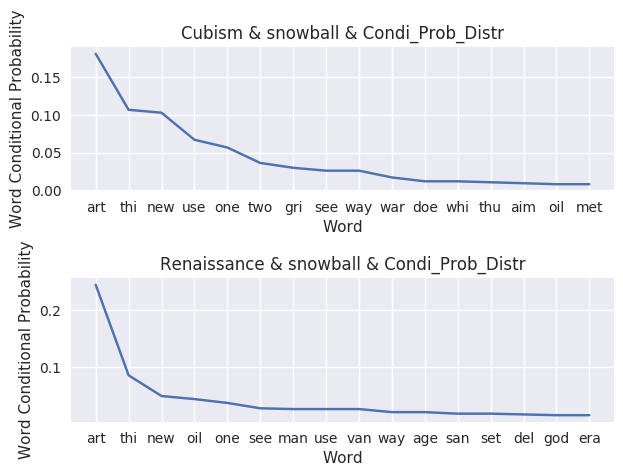

In [12]:
Cubism_cpdist_porter = nltk.ConditionalProbDist(Cubism_cfdist_porter, nltk.ELEProbDist)
Renaissance_cpdist_porter = nltk.ConditionalProbDist(Renaissance_cfdist_porter, nltk.ELEProbDist)

# tokens: Cubism_normalized_tokens_porter; Cubism_normalized_tokens_snowball
# tokens: Renaissance_normalized_tokens_porter; Renaissance_normalized_tokens_snowball
# cfdist: Cubism_cfdist_porter; Cubism_cfdist_snowball
# cfdist: Renaissance_cfdist_porter; Renaissance_cfdist_snowball
def condProbDist(cpdist, token, cfdist, wordlength):
    condProbDist_DF = {
        'word':[], # word with the given length
        'condProb':[], # conditional probability of the word
    }
    for word in cfdist[wordlength]:
        condProbDist_DF['word'].append(word)
        condProbDist_DF['condProb'].append(cpdist[wordlength].prob(word))
    return pandas.DataFrame(condProbDist_DF)

# call the function
Cubism_cpdistDF_snowball = condProbDist(Cubism_cpdist_porter, 
                                      Cubism_normalized_tokens_porter, 
                                      Cubism_cfdist_porter, 3)
Renaissance_cpdistDF_snowball = condProbDist(Renaissance_cpdist_porter, 
                                      Renaissance_normalized_tokens_porter, 
                                      Renaissance_cfdist_porter, 3)

# define the function below to sort the word on 
# the x axis of conditional probability value
# cpdistDF: Cubism_cpdistDF_porter
# cpdistDF: Renaissance_cpdistDF_porter
def xticks(cpdistDF, stopnum):
    cpdistDF.sort_values('condProb', ascending=False, inplace=True)
    myxticks = []
    mytemp = cpdistDF[:stopnum]
    for tempitem in mytemp['word']:
        myxticks.append(tempitem)
    return myxticks

num = 16

plt.figure(1)

plt.subplot(211)
Cubism_cpdistDF_snowball.sort_values('condProb', ascending=False, inplace=True)
temp = Cubism_cpdistDF_snowball[:num]
c = xticks(Cubism_cpdistDF_snowball,num)
plt.title('Cubism & snowball & Condi_Prob_Distr')
plt.xticks(range(len(Cubism_cpdistDF_snowball[:num])),c)
plt.plot(range(len(temp)),temp['condProb'])
plt.xlabel('Word')
plt.ylabel('Word Conditional Probability')

plt.subplot(212)
Renaissance_cpdistDF_snowball.sort_values('condProb', ascending=False, inplace=True)
temp = Renaissance_cpdistDF_snowball[:num]
c = xticks(Renaissance_cpdistDF_snowball,num)
plt.title('Renaissance & snowball & Condi_Prob_Distr')
plt.xticks(range(len(Renaissance_cpdistDF_snowball[:num])),c)
plt.plot(range(len(temp)),temp['condProb'])
plt.xlabel('Word')
plt.ylabel('Word Conditional Probability')

plt.tight_layout()
plt.show()

### <span style="color:purple">2.4 Part Of Speech</span>
<span style="color:purple">I plot the POS conditional frequency distribution for "picasso" and "god". Both are obviously nouns, while there are instances where they are used as adjectives (may subject to erorrs,).<br>
Then I plot the NN POS for both cases and find that the nouns highly frequent used are names of the most famous artists at the time, such as picasso and braque in Cubism text and michelangelo in Renaissance text. Next is the important cities for both movements, namely "paris" for Cubism and "italy" for Renaissance </span>

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jingyingb/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


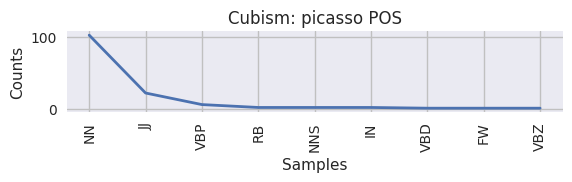

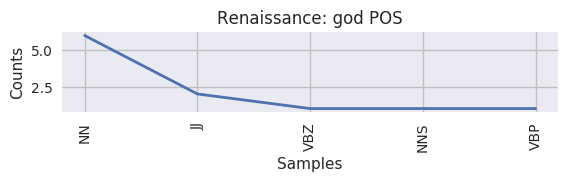

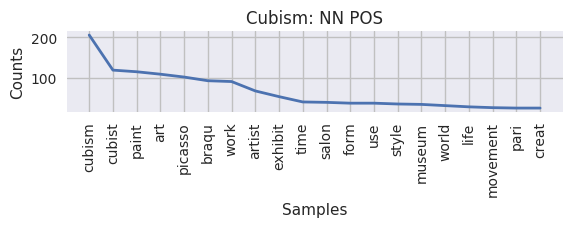

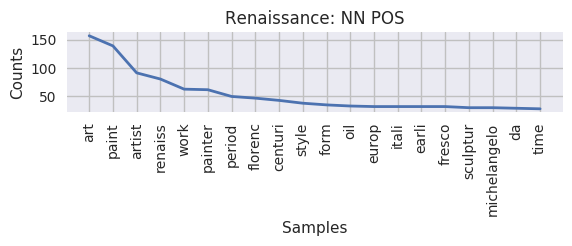

In [13]:
import nltk
nltk.download('averaged_perceptron_tagger')
Cubism_normalized_tokens_POS = nltk.pos_tag(Cubism_normalized_tokens_snowball)
Cubism_cfdist_WordtoPOS = nltk.ConditionalFreqDist(Cubism_normalized_tokens_POS)
Renaissance_normalized_tokens_POS = nltk.pos_tag(Renaissance_normalized_tokens_snowball)
Renaissance_cfdist_WordtoPOS = nltk.ConditionalFreqDist(Renaissance_normalized_tokens_POS)

Cubism_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in Cubism_normalized_tokens_POS)
Renaissance_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in Renaissance_normalized_tokens_POS)

plt.figure(1)

plt.subplot(411)
plt.title('Cubism: picasso POS')
Cubism_cfdist_WordtoPOS['picasso'].plot()

plt.subplot(412)
plt.title('Renaissance: god POS')
Renaissance_cfdist_WordtoPOS['god'].plot()

plt.subplot(413)
plt.title('Cubism: NN POS')
Cubism_POStoWord['NN'].plot(20)

plt.subplot(414)
plt.title('Renaissance: NN POS')
Renaissance_POStoWord['NN'].plot(20)

plt.tight_layout()
plt.show()

### <span style="color:purple">2.5 *WORD CLOUD* or Wordl</span>

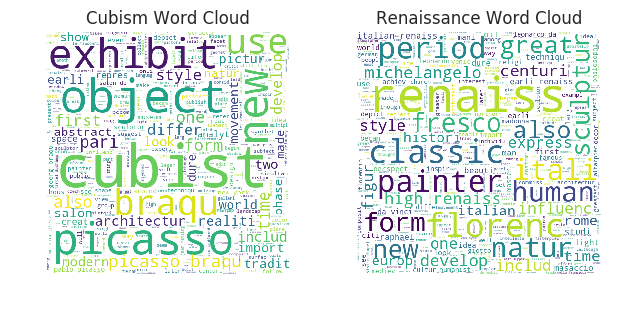

In [14]:
x1 = Cubism_normalized_tokens_snowball
x2 = Renaissance_normalized_tokens_snowball
while 'artist' in x1: x1.remove('artist')
while 'artist' in x2: x2.remove('artist')
while 'art' in x1: x1.remove('art')
while 'art' in x2: x2.remove('art')
while 'cubism' in x1: x1.remove('cubism')
while 'renaissan' in x1: x1.remove('renaissan')
while 'paint' in x1: x1.remove('paint')
while 'paint' in x2: x2.remove('paint')
while 'work' in x1: x1.remove('work')
while 'work' in x2: x2.remove('work')
wc1 = wordcloud.WordCloud(background_color="white", max_words=400, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(x1))
wc2 = wordcloud.WordCloud(background_color="white", max_words=400, width= 1000, height = 1000, mode ='RGBA', scale=.5).generate(' '.join(x2))

plt.figure(1)

plt.subplot(121)
plt.title('Cubism Word Cloud')
plt.imshow(wc1)
plt.axis("off")

plt.subplot(122)
plt.title('Renaissance Word Cloud')
plt.imshow(wc2)
plt.axis("off")

plt.tight_layout()
plt.show()

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that identify statistically significant bigrams, trigrams, quadgrams, higher-order *n*grams and skipgrams. Explore whether these collocations are idiomatic and so irreducible to the semantic sum of their component words. You can do this by examination of conditional frequencies (e.g., what else is 'united' besides the 'United States'). If these phrases are idiomatic, what do they suggest about the culture of the world producing them?

<span style="color:red">**Stretch**: In Manning and Schütze's textbook, there Section 5.3.2 explores how to use the *t*-test to find words whose co-occurance patterns best distinguish two words. Implement that and use it to explore phrases in your corpus. For instance, you could tell what words come after "America" much more often than after "Iraq"?</span> 

In [124]:
# count the number of bigrams
CubismBigrams = nltk.collocations.BigramCollocationFinder.from_words(Cubism_normalized_tokens_snowball)
RenaissanceBigrams = nltk.collocations.BigramCollocationFinder.from_words(Renaissance_normalized_tokens_snowball)
print("There are {} bigrams in the finder".format(CubismBigrams.N))
print("There are {} bigrams in the finder".format(RenaissanceBigrams.N))

There are 9115 bigrams in the finder
There are 8493 bigrams in the finder


### <span style="color:purple">3.1 Bigram Score </span>

In [128]:
def bigramScoring(count, wordsTuple, total):
    return count
print(CubismBigrams.nbest(bigramScoring, 10))

birgramScores = []
def bigramPrinting(count, wordsTuple, total):
    global birgramScores
    birgramScores.append("The first word is:  {}, The second word is: {}".format(*wordsTuple))
    #Returns None so all the tuples are considered to have the same rank
CubismBigrams.nbest(bigramPrinting, 10)
print('\n'.join(birgramScores[8000:8010]))

[('picasso', 'braqu'), ('pablo', 'picasso'), ('georg', 'braqu'), ('new', 'york'), ('still', 'life'), ('metzing', 'gleiz'), ('albert', 'gleiz'), ('jean', 'metzing'), ('juan', 'gris'), ('de', 'la')]



### <span style="color:purple">3.2.3 Trigrams</span>

In [ ]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
CubismTrigrams = nltk.collocations.TrigramCollocationFinder.from_words(Cubism_normalized_tokens)
CubismTrigrams.score_ngrams(trigram_measures.student_t)[1:10]

### <span style="color:purple"> 3.2.4 n-grams (for any number n) </span>

In [ ]:
# the result below is for quadgrams
# just changing the number will give us n-grams
Ngrams = nltk.ngrams(Cubism_normalized_tokens, 4)
Counts = {}
for ngram in list(Ngrams):
    if ngram in Counts.keys():
        Counts[ngram] += 1
    else:
        Counts[ngram] = 1
Filtered = {}
for key in Counts.keys():
    if Counts[key] < 2:
        pass
    else:
        Filtered[key] = Counts[key]
print(Filtered)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">Construct cells immediately below this that calculate the KL and $\chi^2$ divergences, and the KS and Wasserstein distances between four separate corpora, plot these with heatmaps, and then array them in two dimensions with multidimensional scaling as above. What does this reveal about relations between the corpora? Which analysis (and divergence or distribution) distinguishes the authors or documents better? 

<span style="color:red">**Stretch**: Calculate the <a "href=https://en.wikipedia.org/wiki/Jensen–Shannon_divergence" target="_blank">Jensen-Shannon Divergence</a> between your four corpora. What is the relationship between the KL and JS divergences?</span> 

### <span style="color:purple">4.1 Heat Maps for KL, chi2, KS, and Wasserstein Divergence </span>
<span style="color:purple">I use four separate corpora, namely the previous Cubism and Renaissance, and two additional Renaissance_Art_and_Poem and Modern_Art. Basically, two copora are relavent to Renaissance era and two are relavent to Modern Art. <br>
**Corpora** -- all four corpora have been normalized by english stop word list and snowball.stemmer. <br>
**Hypothesis** -- two for Renaissance should be similar to each other with a lower level of divergence. But these two may be farer away from the Cubism and Modern Art. However, Cubism is only one branch of Modern Art, so even if there is much divergence, it is unsurprising. <br>
**Reults** -- Results from different divergence statistics are quite different. This may be explained by the properties of the divergences. In KL, only Modern art and Reneissance art tend to be similar, though this is a bit counterintuitive. chi2 shows little divergence between the corpora as well as the asymmetry of the divergence. KS and Wasserstein tend to show the same thing, Cubism and Renaissance are similar, ModernArt and RenaissanceArt are similar. One potential explanation is that the former group is a mere mixture of articles or encyclopedias gathered online. In contrast, the latter group are two books from Gutenberg library, which should have much more rigorous structure and standard langugae.   
   
* **KL** -- computes the relative entropy between two distributions--how they differ in bits. It is the sum of elementwise divergences<br>
* **chi2** -- indicates whether the same statistical inferences can be drawn from them both<br>
* **KS** -- calculates the distance between the cumulative distribution function of the two distributions to be compared. It can be interpreted as a test of whether two distributions are drawn from the same underlying distribution. <br>
* **Wasserstein** -- can be seen as the minimum amount of "work" required to transform P into Q, where "work" is measured as the amount of distribution weight that must be moved, multiplied by the distance it has to be moved. <br>
</span>

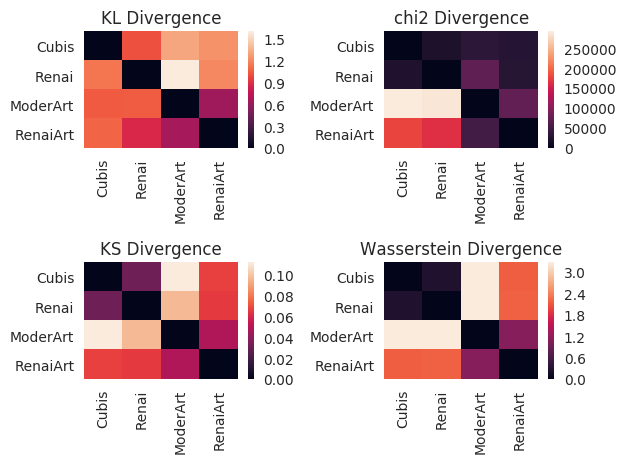

In [23]:
# read the raw text and tokenize them
with open('ModernPainting.txt') as f:
    ModernPaintingBook = f.read()
with open('RenaissanceArtandPoetry.txt') as f:
    RenaissanceArtBook = f.read()
ModernArt_tokens = nltk.word_tokenize(ModernPaintingBook)
RenaissanceArt_tokens = nltk.word_tokenize(RenaissanceArtBook)
ModernArt_normalized_tokens_snowball = normlizeTokens(ModernArt_tokens, stopwordLst = stop_words_nltk, stemmer = snowball)
RenaissanceArt_normalized_tokens_snowball = normlizeTokens(RenaissanceArt_tokens, stopwordLst = stop_words_nltk, stemmer = snowball)

# build the corpora containing the four files. 
corpora = []
corpora.append(Cubism_normalized_tokens_snowball)
corpora.append(Renaissance_normalized_tokens_snowball)
corpora.append(ModernArt_normalized_tokens_snowball)
corpora.append(RenaissanceArt_normalized_tokens_snowball)

# text: CubismArt, RenaissanceArt, ModernPaintingBook, RenaissanceArtBook
# tokens: Cubism_tokens, Renaissance_tokens, ModernArt_tokens, RenaissanceArt_tokens
# normalized tokens: Cubism_normalized_tokens_snowball, Renaissance_normalized_tokens_snowball
# normalized tokens: ModernArt_normalized_tokens_snowball, RenaissanceArt_normalized_tokens_snowball
Cubism_Words = set(Cubism_normalized_tokens_snowball)
Renaissance_Words = set(Renaissance_normalized_tokens_snowball)
ModernArt_Words = set(ModernArt_normalized_tokens_snowball)
RenaissanceArt_Words = set(RenaissanceArt_normalized_tokens_snowball)

commonWords = Cubism_Words & Renaissance_Words
commonDict = {word: index for index, word in enumerate(commonWords)}
commonDict['student']

def makeProbsArray(tokens, commonDict):
    countList = [0] * len(commonDict)
    for word in tokens:
        try:
            countList[commonDict[word]] += 1
        except KeyError:
            pass
    countArray = np.array(countList)
    return countArray / countArray.sum()

# define the divergence function
def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

# divergence plot between four corpora          
fileids = []
fileids.append('Cubis')
fileids.append('Renai')
fileids.append('ModerArt')
fileids.append('RenaiArt')
fileids

L_KL = []
L_chi2 = []
L_KS = []
L_Wass = []
for p in corpora:
    l_KL = []
    l_chi2 = []
    l_KS = []
    l_Wass = []
    for q in corpora:
        l_KL.append(Divergence(p,q, difference = 'KL'))
        l_chi2.append(Divergence(p,q, difference = 'Chi2'))
        l_KS.append(Divergence(p,q, difference = 'KS'))
        l_Wass.append(Divergence(p,q, difference = 'Wasserstein'))
    L_KL.append(l_KL)
    L_chi2.append(l_chi2)
    L_KS.append(l_KS)
    L_Wass.append(l_Wass)
    
Diverge_KL = np.array(L_KL)
Diverge_chi2 = np.array(L_chi2)
Diverge_KS = np.array(L_KS)
Diverge_Wass = np.array(L_Wass)

# Divergence plot
plt.figure()
plt.subplot(221)
plt.title('KL Divergence')
div = pandas.DataFrame(Diverge_KL, columns = fileids, index = fileids)
sns.heatmap(div)

plt.subplot(222)
plt.title('chi2 Divergence')
div = pandas.DataFrame(Diverge_chi2, columns = fileids, index = fileids)
sns.heatmap(div)

plt.subplot(223)
plt.title('KS Divergence')
div = pandas.DataFrame(Diverge_KS, columns = fileids, index = fileids)
sns.heatmap(div)


plt.subplot(224)
plt.title('Wasserstein Divergence')
div = pandas.DataFrame(Diverge_Wass, columns = fileids, index = fileids)
sns.heatmap(div)

plt.tight_layout()
plt.show()

### <span style="color:purple">4.2 Jensen-Shannon Divergence </span>
<span style="color:purple">Jensen-Shannon Divergence measures the similarity between two probability distributions. It is based on Kullback-Leibler divergence, but with differences such as symmetric property. <br>
Kullback-Leibler divergence from $Q$ to $P$ is defined as:

$D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \log\frac{P(i)}{Q(i)}$.
Jensen–Shannon divergence (JSD) is a symmetrized and smoothed version of the Kullback–Leibler divergence. JSD is defined as:
$JSD(P\|Q) = \frac{1}{2}D_{\mathrm{KL}}(P\|M)+\frac{1}{2}D_{\mathrm{KL}}(Q\|M)$ where $M=\frac{1}{2}(P+Q)$

<span style="color:purple">Hence I use this relationship between Jensen-Shannon divergence and Kullback-Leibler divergence to modify the KL divergence function and create one for JSD <br>
The plot below shows that JSD is a symmetric and smoothed version of KL divergenc.
</span>

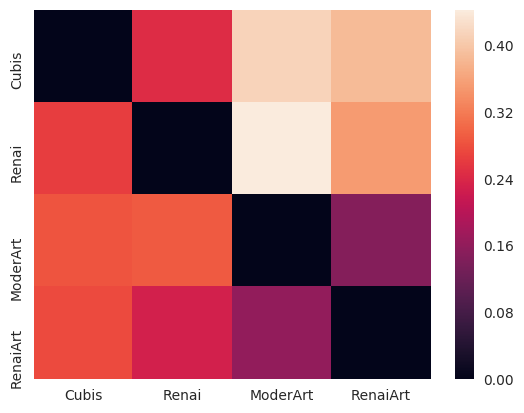

In [121]:
def kl_divergence(P, Q):
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.entropy(p, q)

def JSD_divergence(corpus1, corpus2):
    freqP = nltk.FreqDist(corpus1)
    P = pandas.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pandas.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    M = (p+q)/2
    D_kl = scipy.stats.entropy(p, M)
    D_k2 = scipy.stats.entropy(q, M)
    return (D_kl+D_k2)/2

L = []
for p in corpora:
    l = []
    for q in corpora:
        l.append(JSD_divergence(p, q))
    L.append(l)
M = np.array(L)
fig = plt.figure()
plt.title('JSD Divergence')
div = pandas.DataFrame(M, columns = fileids, index = fileids)
ax = sns.heatmap(div)
plt.show()



In [107]:
P['frequency'][5]

10